<a href="https://colab.research.google.com/github/AshishK0171/internship_covid/blob/main/covid_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 required modules




In [3]:
import numpy as np
import pandas as pd
import seaborn as sb

In [19]:
from matplotlib import pyplot as plt

getting the data from the link

In [50]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vac_data=pd.read_csv(url,index_col="location")

getting only the required data from the whole

In [51]:
ind_vac=vac_data.loc["India"]

contents of the data set-INDIA

In [52]:
ind_vac 


,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
location,,,,,,,,,,,
India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0
India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0
India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0
India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0
...,...,...,...,...,...,...,...,...,...,...,...
India,IND,2021-06-07,230490652.0,185501579.0,44989073.0,2449607.0,2862965.0,16.70,13.44,3.26,2075.0
India,IND,2021-06-08,233680929.0,188363894.0,45317035.0,3190277.0,2935027.0,16.93,13.65,3.28,2127.0
India,IND,2021-06-09,236856505.0,191222380.0,45634125.0,3175576.0,3025477.0,17.16,13.86,3.31,2192.0


In [ ]:
ind_vac.isnull().sum()




```
iso_code                                0
date                                    0
total_vaccinations                      5
people_vaccinated                       5
people_fully_vaccinated                34
daily_vaccinations_raw                 10
daily_vaccinations                      1
total_vaccinations_per_hundred          5
people_vaccinated_per_hundred           5
people_fully_vaccinated_per_hundred    34
daily_vaccinations_per_million          1
dtype: int64
```



**DATA VIZUALIZATION**

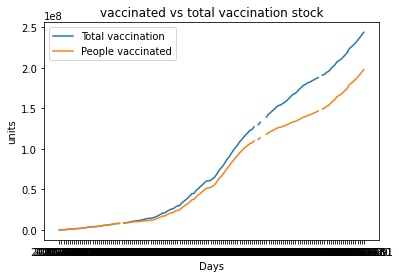

In [64]:
ind_vac.dropna(subset=['total_vaccinations','people_vaccinated'],how='any')
plt.plot(figsize=(10,12))
plt.title("vaccinated vs total vaccination stock")
plt.xlabel("Days")
plt.ylabel("units")


plt.plot(ind_vac.date,ind_vac.total_vaccinations)
plt.plot(ind_vac.date,ind_vac.people_vaccinated)
plt.legend(['Total vaccination',"People vaccinated"])
plt.show()

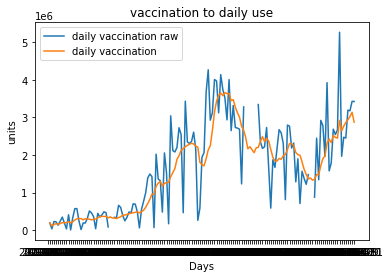

In [68]:
ind_vac.dropna(subset=['total_vaccinations','daily_vaccinations_raw','daily_vaccinations'],how='any')

plt.title("vaccination to daily use")
plt.xlabel("Days")
plt.ylabel("units")


# plt.plot(ind_vac.date,ind_vac.total_vaccinations)
plt.plot(ind_vac.date,ind_vac.daily_vaccinations_raw)
plt.plot(ind_vac.date,ind_vac.daily_vaccinations)
plt.legend(["daily vaccination raw",'daily vaccination'])
plt.show()

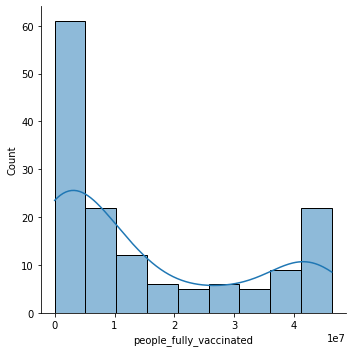

In [105]:
# sb.displot( x="people_fully_vaccinated",data=copy_data,kde=True)

In [ ]:
# ax=sb.lineplot(x='date',y='total_vaccinations',data=ind_vac)

In [90]:
copy_data=ind_vac

In [91]:
copy_data.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,




```
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64
```



In [ ]:
copy_data.isnull().sum()


In [75]:
copy_data.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.998883,0.983239,0.590951,0.684832,1.000000,0.998879,0.983296,0.684864
people_vaccinated,0.998883,1.000000,0.973525,0.609953,0.708847,0.998881,1.000000,0.973596,0.708877
people_fully_vaccinated,0.983239,0.973525,1.000000,0.505194,0.577757,0.983246,0.973510,0.999998,0.577798
daily_vaccinations_raw,0.590951,0.609953,0.505194,1.000000,0.795031,0.590894,0.610022,0.505397,0.795002
daily_vaccinations,0.684832,0.708847,0.577757,0.795031,1.000000,0.684819,0.708876,0.578020,1.000000
total_vaccinations_per_hundred,1.000000,0.998881,0.983246,0.590894,0.684819,1.000000,0.998878,0.983303,0.684852
people_vaccinated_per_hundred,0.998879,1.000000,0.973510,0.610022,0.708876,0.998878,1.000000,0.973581,0.708906
people_fully_vaccinated_per_hundred,0.983296,0.973596,0.999998,0.505397,0.578020,0.983303,0.973581,1.000000,0.578061
daily_vaccinations_per_million,0.684864,0.708877,0.577798,0.795002,1.000000,0.684852,0.708906,0.578061,1.000000


In [ ]:
sb.heatmap(copy_data.corr())

In [77]:
X=copy_data[['total_vaccinations','people_vaccinated','total_vaccinations_per_hundred','people_vaccinated_per_hundred']]
Y=copy_data[['people_fully_vaccinated']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=25000)


In [79]:
from sklearn.linear_model import LinearRegression
lin_r=LinearRegression()
lin_r.fit(X_train,Y_train)

lin_r_pred=lin_r.predict(X_test)
print(lin_r_pred)

[[-4.84814920e-08]
 [ 1.48742540e+07]
 [ 4.59559070e+07]
 [ 2.45152130e+07]
 [-4.46864873e-08]
 [ 6.54246800e+06]
 [ 3.28951730e+07]
 [-3.37422338e-08]
 [-2.66941025e-08]
 [ 2.16339000e+05]
 [-3.91155481e-08]
 [ 3.97849510e+07]
 [-3.91155481e-08]
 [ 4.24195600e+07]
 [ 9.06531800e+06]
 [-3.06051659e-08]
 [ 9.60642000e+05]
 [ 7.47865400e+06]
 [ 4.12622330e+07]
 [ 7.86344100e+06]
 [ 7.66800000e+03]
 [ 5.14295300e+06]
 [ 8.87020100e+06]
 [ 4.38113420e+07]
 [ 2.59779900e+06]
 [ 2.91228330e+07]
 [ 8.82834600e+06]
 [-4.53308605e-08]
 [-3.05284902e-08]
 [ 1.38776640e+07]]


In [ ]:
lin_r_a=lin_r.score(X_test,Y_test)
print(lin_r_a)